In [1]:
def jump_process(S0, r, sigma, lamb_P, lamb_T, mu_P, mu_T, delta_P, delta_T, N):
    """
    S0 = initial stock price
    r = risk-free rate, assumed constant
    sigma = asset volatility, assumed constant
    lamb_i= jump intensity of shock i, i.e. probability of jump p.a., assumed to variate with time
    mu_i = expected size of jump i, assumed to variate with time
    delta_i = jump i standard deviation, assumed to variate with time
    N = number of days
    
    """
    
    import numpy as np
    dt = 1.0/N
    rP = lamb_P*(np.exp(mu_P+0.5*delta_P**2)-1)
    rT = lamb_T*(np.exp(mu_T+0.5*delta_T**2)-1)
    W = np.random.standard_normal((N+1, 1))
    Y_P = np.random.standard_normal((N+1, 1))
    N_P = np.random.poisson(lamb_P*dt, (N+1, 1))
    Y_T = np.random.standard_normal((N+1, 1))
    N_T = np.random.poisson(lamb_T*dt, (N+1, 1))
    
    S = np.zeros((N+1,1))
    S[0] = S0
    
    for t in range(1, N+1):
        S[t] = S[t - 1]*(np.exp((r-rP-rT-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*W[t])+(np.exp(mu_P+delta_P*Y_P[t])-1)*N_P[t] + (np.exp(mu_T+delta_T*Y_T[t])-1)*N_T[t])
        S[t] = np.maximum(S[t], 0)
        
    
    return S
        
    
    

$\lambda$ = nombre moyen d'occurences dans un intervalle de temps fixé.
Donc plus lambda est élevé, plus la chance qu'il y ait un choc est élevé.

In [193]:
def MCS_jump_process(S0, r, sigma, dt, n_sim, lamb_P, mu_P, delta_P,
                    lamb_T, mu_T, delta_T):
    """
    r = riskfree rate return (per year)
    sigma = asset volatility (per year)
    dt = number of years between S0 and predicted return
    n_sim = number of simulations to run for the Monte Carlo simulation
    
    """
    rP = lamb_P * (np.exp(mu_P-0.5*delta_P**2)-1)
    rT = lamb_T * (np.exp(mu_T-0.5*delta_T**2)-1)
    W1 = np.random.standard_normal(n_sim) #brownian motion for asset diffusion term
    W2 = np.random.standard_normal(n_sim) #brownian motion for physical shock diffusion term
    W3 = np.random.standard_normal(n_sim) #brownian motion for transition shock diffusion term
    N_P = np.random.poisson(lamb_P, n_sim)
    N_T = np.random.poisson(lamb_T, n_sim)
    
    ST1 = S0 * ( np.exp((r-rP-rT-0.5*sigma** 2)*dt+sigma*np.sqrt(dt) * W1 ) + (np.exp(mu_P+delta_P*W2)-1)*N_P + (np.exp(mu_T+delta_T*W3)-1)*N_T )
    
    mean_ST1 = np.mean(ST1)
    R = (mean_ST1-S0)/S0
    
    return R

In [194]:
R = MCS_jump_process(S0=100, r=0.05, sigma=0.075, dt=1/30, n_sim=50000, lamb_P=0.25, mu_P=-0.3, delta_P=0.35,
                    lamb_T=0.04, mu_T=-0.08, delta_T=0.001)

In [195]:
R

-0.05267036034505921

In [261]:
wB_gov = np.linspace(0.2, 0.3, 30)

In [262]:
wB_inv = np.linspace(0.2, 0.25, 30)

In [283]:
np.exp(3**1.00001)/(1+np.exp(3**1.00001))

0.952575615757409

In [274]:
def sigmoid(t):
    return np.exp(t) / (1+np.exp(t))

In [297]:
sigmoid(30) - 0.75

0.2499999999999064

In [319]:
lamb_P=np.zeros((len(wB_gov), 1))
alpha = 0
for t in range(len(wB_gov)):
    power = 1+(t/100)
    lamb_P[t] = t**power / 1000

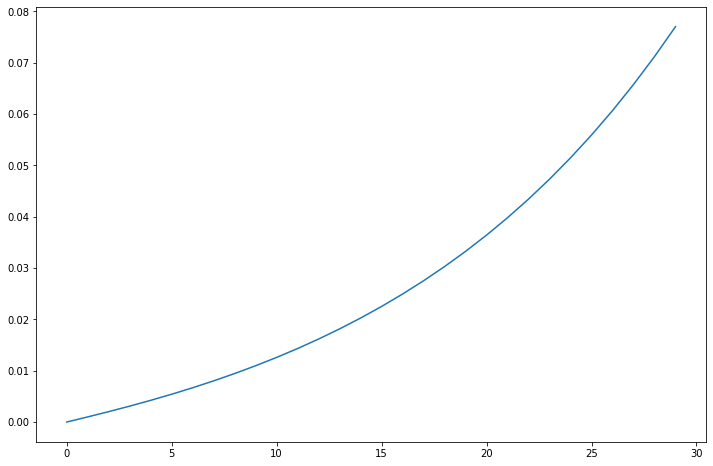

In [320]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(lamb_P)

In [211]:
lamb_P

array([[0.00000000e+00],
       [1.29310345e-01],
       [6.34482759e-01],
       [1.69137931e+00],
       [3.47586207e+00],
       [6.16379310e+00],
       [9.93103448e+00],
       [1.49534483e+01],
       [2.14068966e+01],
       [2.94672414e+01],
       [3.93103448e+01],
       [5.11120690e+01],
       [6.50482759e+01],
       [8.12948276e+01],
       [1.00027586e+02],
       [1.21422414e+02],
       [1.45655172e+02],
       [1.72901724e+02],
       [2.03337931e+02],
       [2.37139655e+02],
       [2.74482759e+02],
       [3.15543103e+02],
       [3.60496552e+02],
       [4.09518966e+02],
       [4.62786207e+02],
       [5.20474138e+02],
       [5.82758621e+02],
       [6.49815517e+02],
       [7.21820690e+02],
       [7.98950000e+02]])

In [131]:
S0 = 100
r = 0.05
sigma = 0.25
dt = 1
I = 50000
lamb = 0.05
mu = 10
delta = 0
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
sn1 = npr.standard_normal(I)
sn2 = npr.standard_normal(I)
poi = npr.poisson(lamb, I)


ST1 = S0 * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sn1)+ (np.exp(mu + delta * sn2) - 1)* poi)




In [132]:
np.mean(ST1)

112021.51903238698

In [127]:
mu = 100
lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)

2.688117141816136e+38

In [ ]:
r - rj

In [129]:
np.mean(ST1)

105.26533546005703

In [142]:
S0 = 100  # initial value
r = 100  # constant short rate
sigma = 0.  # constant volatility
dt = 1/250 # in years
n_sim = 50000  # number of random draws
lamb_P = 0.0000005
mu_P = -0.08
delta_P = 0.03
lamb_T = 0.0000005
mu_T = -0.004
delta_T = 0.05
MCS_jump_process(S0, r, sigma, dt, n_sim, lamb_P, mu_P, delta_P,
                    lamb_T, mu_T, delta_T)

0.4918246978875274

In [1]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

In [3]:
import numpy as np
import numpy.random as npr
M = 1
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sn1[t])+ (np.exp(mu + delta * sn2[t]) - 1)* poi[t])
    S[t] = np.maximum(S[t], 0)

In [130]:
S0 = 100  # initial value
r = 0.1  # constant short rate
sigma = 0.05  # constant volatility
T = 1/250 # in years
I = 50000  # number of random draws
lamb_P = 0.0005
mu_P = -0.08
delta_P = 0.03
lamb_T = 0.0005
mu_T = -0.004
delta_T = 0.05
rP = lamb_P * (np.exp(mu_P - 0.5*delta_P**2) - 1)
rT = lamb_T * (np.exp(mu_T - 0.5*delta_T**2) - 1)
W1 = np.random.standard_normal(I) #brownian motion for asset diffusion term
W2 = np.random.standard_normal(I) #brownian motion for physical shock diffusion term
W3 = np.random.standard_normal(I) #brownian motion for transition shock diffusion term
N_P = np.random.poisson(lamb_P, I)
N_T = np.random.poisson(lamb_T, I)

ST1 = S0 * ( np.exp((r-rP-rT-0.5*sigma** 2)*T+sigma*np.sqrt(T) * W1 ) + (np.exp(mu_P+delta_P*W2)-1)*N_P + (np.exp(mu_T+delta_T*W3)-1)*N_T ) 

In [131]:
np.mean(ST1)

100.03663176344143

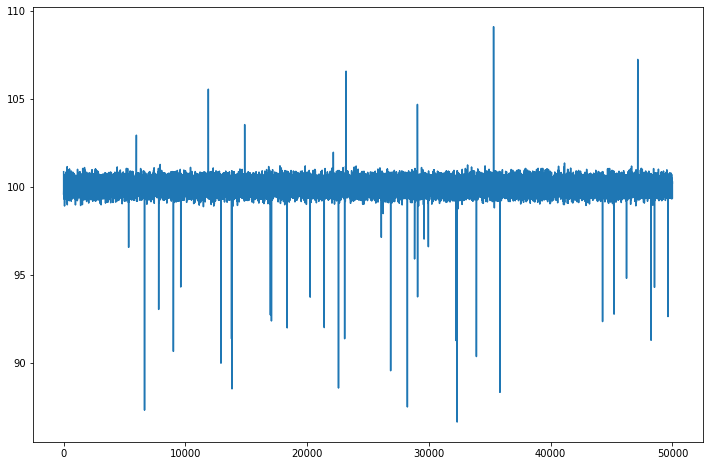

In [132]:
plt.plot(ST1)

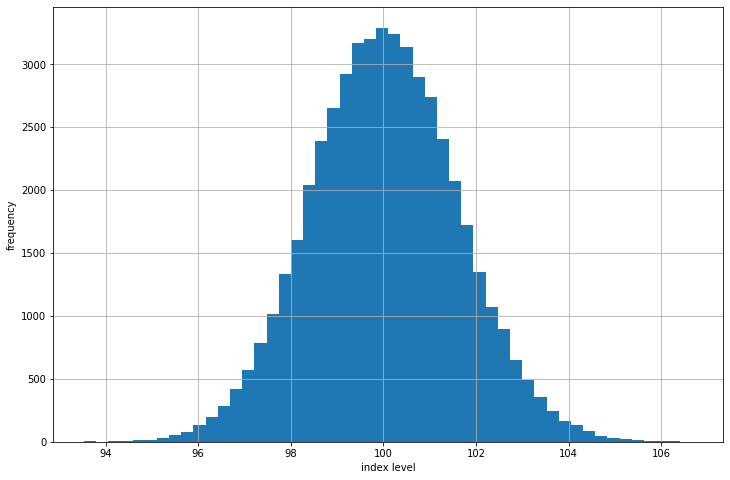

In [41]:
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

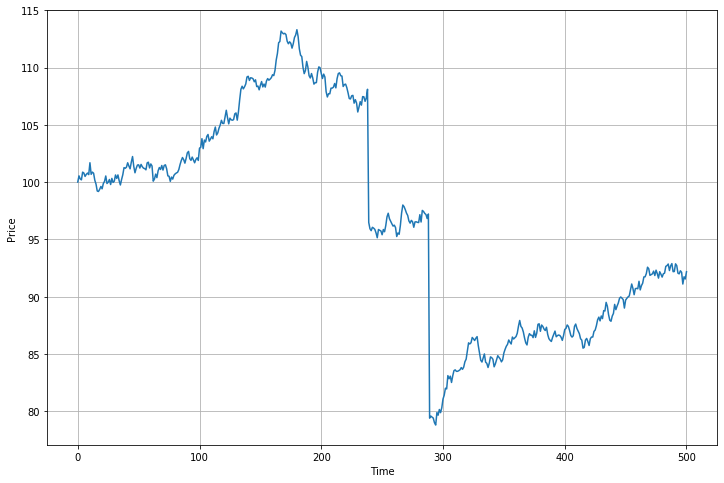

In [2]:
S = jump_process(S0=100, r=-0.002, sigma=0.1, lamb_P=0.65, 
                 lamb_T=0.5, mu_P=-0.25, mu_T=-0.23, delta_P=0.1, delta_T=0.05, N=500)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(S, lw=1.5)
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)

positive $\mu$ = positive shock, negative $\mu$ = negative shock

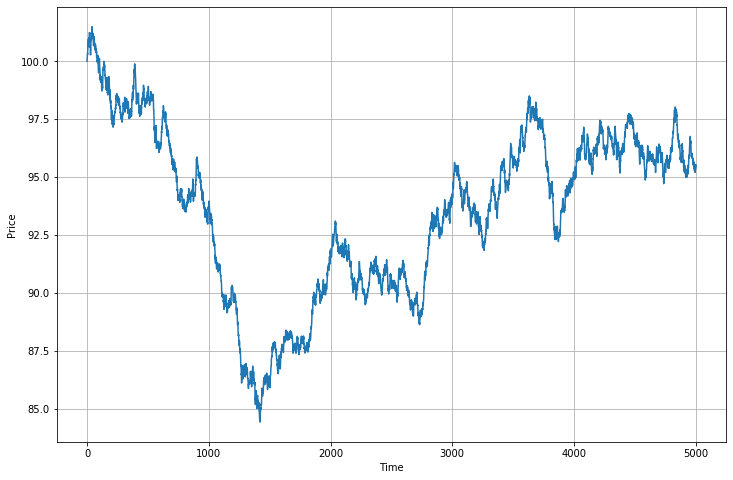

In [81]:
S = jump_process(S0=100, r=0.15, sigma=0.1, lamb_P=0, 
                 lamb_T=4, mu_P=0, mu_T=-0.0001, delta_P=0, delta_T=0, N=5000)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(S, lw=1.5)
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)

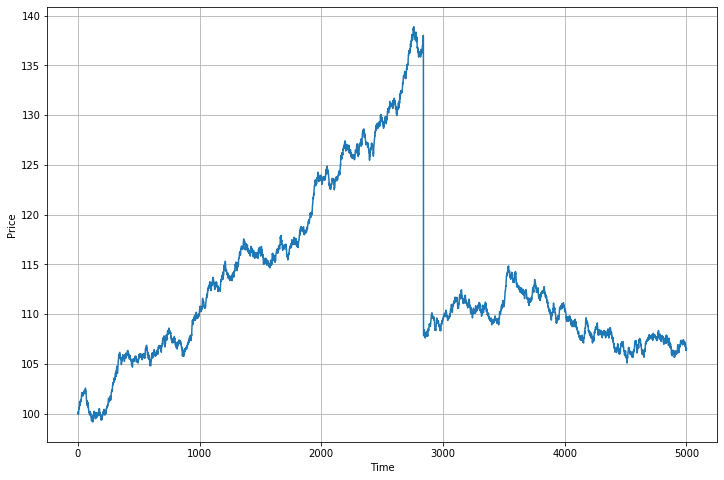

In [5]:
S = jump_process(S0=100, r=-0.002, sigma=0.1, lamb_P=0.65, 
                 lamb_T=0.5, mu_P=-0.25, mu_T=-0.23, delta_P=0.1, delta_T=0.05, N=5000)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(S, lw=1.5)
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)

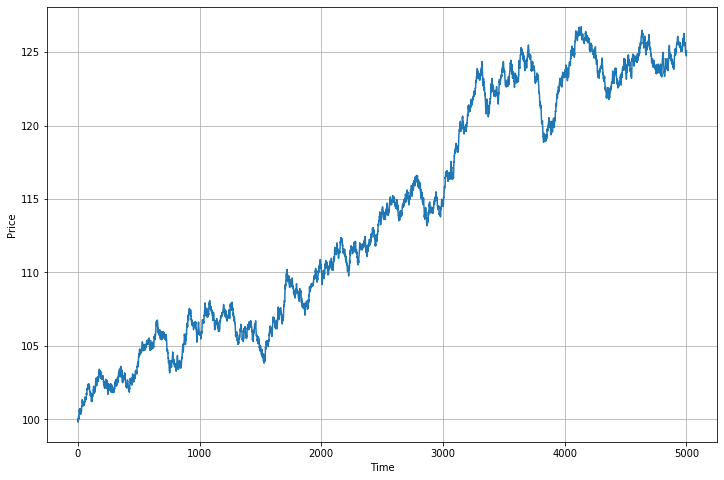

In [6]:
S = jump_process(S0=100, r=-0.002, sigma=0.1, lamb_P=0.65, 
                 lamb_T=0.25, mu_P=-0.25, mu_T=-0.23, delta_P=0.1, delta_T=0.05, N=5000)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(S, lw=1.5)
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)

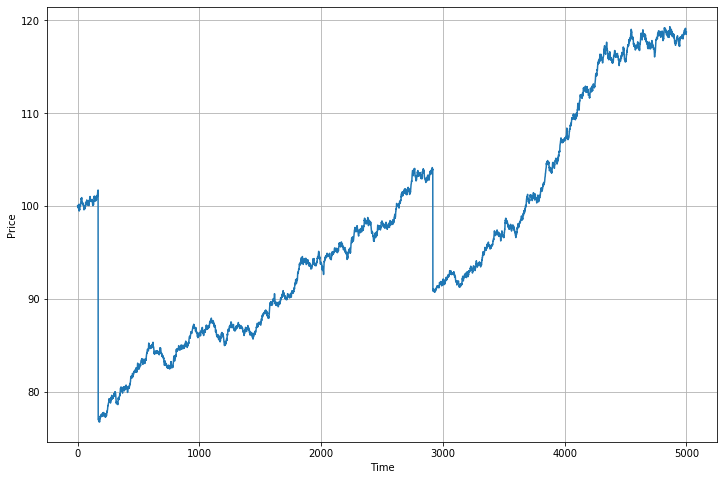

In [7]:
S = jump_process(S0=100, r=-0.002, sigma=0.1, lamb_P=0.65, 
                 lamb_T=0.125, mu_P=-0.25, mu_T=-0.23, delta_P=0.1, delta_T=0.05, N=5000)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(S, lw=1.5)
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)